In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


1.- Carga la base de datos precios_muestra.csv y calcula lo siguiente:

In [ ]:
# Carga la base de datos precios_muestra.csv
d=pd.read_csv("/content/drive/MyDrive/POO/precios_muestra.csv")
d

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [ ]:
# calcula los rendimientos simples.
rendimientos=d.pct_change().dropna()
rendimientos

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# calcula la media de los rendimientos.
media=rendimientos.mean()
media

BLUE      0.01
ORANGE    0.01
dtype: float64

In [ ]:
# calcula la desviación estándar de los rendimientos.
desv=rendimientos.std()
desv

BLUE      0.023977
ORANGE    0.079601
dtype: float64



---
2.- Ahora que tenemos una serie de rendimientos de 12 meses, podemos producir el rendimiento com- puesto multiplicando los rendimientos de los períodos individuales, siempre y cuando los rendimien- tos se expresen como tasas de crecimiento.

Para componer los rendimientos, todo lo que tenemos que hacer es sumar 1 a cada rendimiento y luego multiplicarlos. El resultado está en formato “1+R”, por lo que debemos restar 1.

Calcula el rendimiento compuesto de las dos series.



In [ ]:
#Formula para rendimientos compuestos
rendimiento_compuesto = (rendimientos + 1).prod() - 1
rendimiento_compuesto

BLUE      0.123310
ORANGE    0.087167
dtype: float64

---

3.- Para anualizar el rendimiento de un período, debes capitalizar el rendimiento tantas veces como períodos haya en un año.

Anualiza un 1% mensual, un 4% trimestral y un 0,01% de rentabilidad diaria

In [ ]:
# Anualiza un 1% mensual, un 4% trimestral y un 0,01% de rentabilidad diaria.
def anualizar(rend_periodo, periodos_por_año):
    return (1 + rend_periodo)**periodos_por_año - 1

In [ ]:
rendimiento_men = 0.01
periodos_mes = 12
rendimiento_anualmen = anualizar(rendimiento_men, periodos_mes)
print(f'Rendimiento anualizado mensual: {rendimiento_anualmen:.4f}')

Rendimiento anualizado mensual: 0.1268


In [ ]:
rendimiento_trim = 0.04
periodos_trimestre = 4
rendimiento_anualtrim = anualizar(rendimiento_trim, periodos_trimestre)
print(f'Rendimiento anualizado trimestral: {rendimiento_anualtrim:.4f}') # 4f: son los decimales

Rendimiento anualizado trimestral: 0.1699


In [ ]:
rendimiento_diario = 0.0001  # 0.01% expresado como fracción
periodos_dia = 252  # Asumiendo los que cotizan las acciones
rendimiento_anualdiario = anualizar(rendimiento_diario, periodos_dia)
print(f'Rendimiento anualizado diario: {rendimiento_anualdiario:.6f}')

Rendimiento anualizado diario: 0.025519




---
4.- Ahora, anualiza la volatilidad escalándola (multiplicándola) por la raíz cuadrada del número de períodos por observación.


In [ ]:
import math

In [ ]:
def anualizar_volatilidad(volatilidad_periodo, periodos_por_año):
    return volatilidad_periodo * math.sqrt(periodos_por_año)

In [ ]:
volatilidad_mensual = 0.02  # Ejemplo de volatilidad mensual (expresada como desviación estándar)
periodos_por_mes = 12

volatilidad_anual_mensual = anualizar_volatilidad(volatilidad_mensual, periodos_por_mes)

print(f'Volatilidad anualizada mensual: {volatilidad_anual_mensual:.4f}')

Volatilidad anualizada mensual: 0.0693


---

5.- En tu Módulo (que creaste en las sesiones), escribe atributos a tu clase ya formada en donde calcules el rendimiento compuesto y en donde anualices rendimientos.


In [ ]:
from datetime import datetime

import yfinance as yf

class Asset:
    def __init__(self, ticker, start_date,
                 end_date = datetime.today().strftime('%Y-%m-%d')):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date

    def get_data(self):
        df = yf.download(self.ticker, start = self.start_date, end = self.end_date)
        return df

    def simple_returns(self, adj = False, cum = False):
        df = self.get_data()
        if adj:
            simple_returns = df["Adj Close"].pct_change().dropna()
        else:
            simple_returns = df["Close"].pct_change().dropna()
        if cum:
            simple_returns = (1 + simple_returns).cumprod() - 1
        return simple_returns
    def rendimiento_compuesto (rendimientos):
        return (rendimientos + 1).prod() - 1
    def anualizar(rend_periodo, periodos_por_año):
        return (1 + rend_periodo)**periodos_por_año - 1

In [ ]:
rendimiento_compuesto

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [ ]:
anualizar(0.01,12) #NO ME HA SALIDO

0.12682503013196977

6.- Crea un DataFrame a partir de un diccionario cuyas columnas sean “Stock A” y “Stock B”. Cada columna tendrá 10 valores que deberás elegir a partir de una distribución normal con parámetros 10 (media) y 2 (desviación estándar).


In [ ]:
import numpy as np

# Definir los parámetros de la distribución normal
media = 10
desviacion_estandar = 2

# Generar 10 valores para Stock A y Stock B usando la PDF
stock_a = np.random.normal(loc=media, scale=desviacion_estandar, size=10)
stock_b = np.random.normal(loc=media, scale=desviacion_estandar, size=10)

# Crear el diccionario
data = {'Stock A': stock_a, 'Stock B': stock_b}

# Crear el DataFrame
df = pd.DataFrame(data)
df

,Stock A,Stock B
0,10.004153,14.716488
1,9.064578,11.873623
2,11.263864,10.872709
3,6.794604,10.571714
4,16.342897,9.030423
5,11.088090,10.084264
6,9.862305,13.718057
7,10.257103,10.678109
8,11.166227,10.331855
9,9.978513,10.914252


7.- Usando las funciones ya creadas en tu Módulo, calcular el rendimiento total (compuesto) durante todo el período de tiempo. También, calcula la media y la desviación estándar de cada Stock. Después, anualiza la desviación estándar.


In [ ]:
# calculo de rendimientos simples del data frame
rendimientos_simp1=df.pct_change().dropna()
rendimientos_simp1

,Stock A,Stock B
1,-0.093919,-0.193175
2,0.242624,-0.084297
3,-0.396779,-0.027684
4,1.405276,-0.145794
5,-0.321535,0.116699
6,-0.110550,0.360343
7,0.040031,-0.221602
8,0.088634,-0.032427
9,-0.106367,0.056369


In [ ]:
# definición para el calculo de rendimientos compuestos
def  rendimiento_compuesto (rendimientos_simples):
        return (rendimientos + 1).prod() - 1

In [ ]:
# rendimiento compuesto del data frame
rendimiento_compuesto (rendimientos_simp1)

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [ ]:
rendimientos_simp1.mean()

Stock A    0.083046
Stock B   -0.019063
dtype: float64

In [ ]:
desv_est=rendimientos_simp1.std()

In [ ]:
#Anualizar la desviación estandar
periodos_por_año = 252
desviacion_anual = desv_est * math.sqrt(periodos_por_año)

# Imprimir el resultado
print("Desviación estándar anualizada: ", desviacion_anual)

Desviación estándar anualizada:  Stock A    8.463935
Stock B    2.861688
dtype: float64



8.- Crea dos activos artificiales que llamarás “AA” y “BB”, respectivamente. Supongamos que un cierto activo “AA” pierde 1% por mes durante 12 meses y un cierto activo “BB” gana 1% por mes para los 12 meses. ¿Cuál es el activo más volátil? Recuerda que la volatilidad se mide a través de la desviación estándar.


In [ ]:
import numpy as pd

#Defino el numero de meses y las tasas tanto de perdida como de ganancia
meses = 12
perdida = 0.01
ganancia = 0.01

#Arreglo para almacenar los valores de del activo AA y del activo BB
val_AA = np.zeros(meses)
val_BB = np.zeros(meses)

In [ ]:
for mes in range(meses):
    if mes == 0:
        val_AA[mes] = 100
        val_BB[mes] = 100
    else:
        val_AA[mes] = val_AA[mes - 1] * (1 - perdida)
        val_BB[mes] = val_BB[mes - 1] * (1 + ganancia)

In [ ]:
#Para calcular la desviación estándar
ds_AA = np.std(val_AA)
ds_BB = np.std(val_BB)

In [ ]:
#Imprimimos los valores de los activos
print("Valores finales de AA:", val_AA)
print("Valores finales de BB:", val_BB)

Valores finales de AA: [100.          99.          98.01        97.0299      96.059601
  95.09900499  94.14801494  93.20653479  92.27446944  91.35172475
  90.4382075   89.53382543]
Valores finales de BB: [100.         101.         102.01       103.0301     104.060401
 105.10100501 106.15201506 107.21353521 108.28567056 109.36852727
 110.46221254 111.56683467]


In [ ]:
#Imprimimos la volatibilidad de los activos
print("Desviación estándar de AA:", ds_AA)
print("Desviación estándar de BB:", ds_BB)

Desviación estándar de AA: 3.284415287519737
Desviación estándar de BB: 3.629818484129232


In [ ]:
#El activo BB tuvo una mayor volatilidad ya que su desviación estándar es mayor.

9.- Usando tu Módulo, descarga los tickers “AMZN”, “KO”, “MSFT” desde el primero de enero del 2011 hasta el primero de enero del 2019. Realiza un análisis financiero usando lo visto en clase y los incisos anteriores. Finalmente, realiza un histograma para los rendimientos de cada ticker. ¿Qué observas de los histogramas?


In [ ]:
from datetime import datetime
import yfinance as yf
amazon = Asset("AMZN", "2011-1-1", "2019-1-1")
amazon.get_data()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,9.068500,9.300000,9.060500,9.211000,9.211000,106628000
2011-01-04,9.307500,9.385000,9.189000,9.250500,9.250500,100636000
2011-01-05,9.205000,9.372500,9.203500,9.371000,9.371000,68376000
2011-01-06,9.325000,9.370500,9.262500,9.293000,9.293000,63594000
2011-01-07,9.394000,9.422500,9.187000,9.274500,9.274500,104434000
...,...,...,...,...,...,...
2018-12-24,67.300003,69.801498,65.349998,67.197998,67.197998,144400000
2018-12-26,68.444504,73.657997,68.150497,73.544998,73.544998,208236000
2018-12-27,72.709999,73.449997,69.515503,73.082001,73.082001,194440000


In [ ]:
#Rendimientos simples del ticker "AMZN"
import numpy as pd
import pandas as pd
amazon.simple_returns()
simple_returns_amazondf = pd.DataFrame(amazon.simple_returns())
simple_returns_amazondf

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2011-01-04,0.004288
2011-01-05,0.013026
2011-01-06,-0.008324
2011-01-07,-0.001991
2011-01-10,-0.004367
...,...
2018-12-24,-0.024313
2018-12-26,0.094452
2018-12-27,-0.006295


In [ ]:
#Rendimientos compuestos del ticker "AMZN"
rendimiento_compuesto(amazon.simple_returns())

[*********************100%%**********************]  1 of 1 completed


BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [ ]:
#Rendimientos anualizados del ticker "AMZN"
periodos_por_año = 12
anualizar(amazon.simple_returns(), periodos_por_año)


[*********************100%%**********************]  1 of 1 completed


Date
2011-01-04    0.052690
2011-01-05    0.168017
2011-01-06   -0.095435
2011-01-07   -0.023630
2011-01-10   -0.051161
                ...   
2018-12-24   -0.255738
2018-12-26    1.953668
2018-12-27   -0.072984
2018-12-28    0.143085
2018-12-31    0.212751
Name: Close, Length: 2011, dtype: float64

In [ ]:
ko = Asset("KO", "2011-1-1", "2019-1-1")
ko.get_data()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,32.939999,32.939999,32.555000,32.610001,21.990654,18945600
2011-01-04,32.509998,32.595001,31.905001,31.934999,21.535467,27940400
2011-01-05,31.895000,31.975000,31.430000,31.745001,21.407335,34379000
2011-01-06,31.809999,31.830000,31.415001,31.514999,21.252234,21712400
2011-01-07,31.389999,31.500000,31.280001,31.459999,21.215145,16592800
...,...,...,...,...,...,...
2018-12-24,47.619999,47.869999,45.830002,45.959999,39.630634,10733700
2018-12-26,45.880001,46.959999,45.660000,46.939999,40.475666,14342600
2018-12-27,46.740002,47.549999,46.029999,47.529999,40.984413,16966500


In [ ]:
#Rendimientos simples del ticker "KO"
ko.simple_returns()
simple_returns_kodf = pd.DataFrame(ko.simple_returns())
simple_returns_kodf


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2011-01-04,-0.020699
2011-01-05,-0.005950
2011-01-06,-0.007245
2011-01-07,-0.001745
2011-01-10,0.002225
...,...
2018-12-24,-0.033845
2018-12-26,0.021323
2018-12-27,0.012569


In [ ]:
#Rendimientos compuestos del ticker "KO"
rendimiento_compuesto(ko.simple_returns())

[*********************100%%**********************]  1 of 1 completed


BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [ ]:
#Rendimientos anualizados del ticker "KO"
periodos_por_año = 12
anualizar(ko.simple_returns(), periodos_por_año)


[*********************100%%**********************]  1 of 1 completed


Date
2011-01-04   -0.221975
2011-01-05   -0.069104
2011-01-06   -0.083561
2011-01-07   -0.020743
2011-01-10    0.027030
                ...   
2018-12-24   -0.338450
2018-12-26    0.288121
2018-12-27    0.161707
2018-12-28   -0.080206
2018-12-31    0.038809
Name: Close, Length: 2011, dtype: float64

In [ ]:
#Datos del ticker "MSFT"
msft = Asset("MSFT", "2011-1-1", "2019-1-1")
msft.get_data()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,28.049999,28.180000,27.920000,27.980000,21.708214,53443800
2011-01-04,27.940001,28.170000,27.850000,28.090000,21.793560,54405600
2011-01-05,27.900000,28.010000,27.770000,28.000000,21.723722,58998700
2011-01-06,28.040001,28.850000,27.860001,28.820000,22.359922,88026300
2011-01-07,28.639999,28.740000,28.250000,28.600000,22.189238,73762000
...,...,...,...,...,...,...
2018-12-24,97.680000,97.970001,93.980003,94.129997,89.566994,43935200
2018-12-26,95.139999,100.690002,93.959999,100.559998,95.685310,51634800
2018-12-27,99.300003,101.190002,96.400002,101.180000,96.275230,49498500


In [ ]:
#Rendimientos simples del ticker "MSFT"
msft.simple_returns()
simple_returns_msftdf = pd.DataFrame(msft.simple_returns())
simple_returns_msftdf

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2011-01-04,0.003931
2011-01-05,-0.003204
2011-01-06,0.029286
2011-01-07,-0.007634
2011-01-10,-0.013287
...,...
2018-12-24,-0.041739
2018-12-26,0.068310
2018-12-27,0.006166


In [ ]:
#Rendimientos compuestos del ticker "MSFT"
rendimiento_compuesto(msft.simple_returns())

[*********************100%%**********************]  1 of 1 completed


BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [ ]:
#Rendimientos anualizados del ticker "MSFT"
periodos_por_año = 12
anualizar(msft.simple_returns(), periodos_por_año)

[*********************100%%**********************]  1 of 1 completed


Date
2011-01-04    0.048210
2011-01-05   -0.037778
2011-01-06    0.413941
2011-01-07   -0.087853
2011-01-10   -0.148290
                ...   
2018-12-24   -0.400476
2018-12-26    1.209869
2018-12-27    0.076547
2018-12-28   -0.089774
2018-12-31    0.150535
Name: Close, Length: 2011, dtype: float64

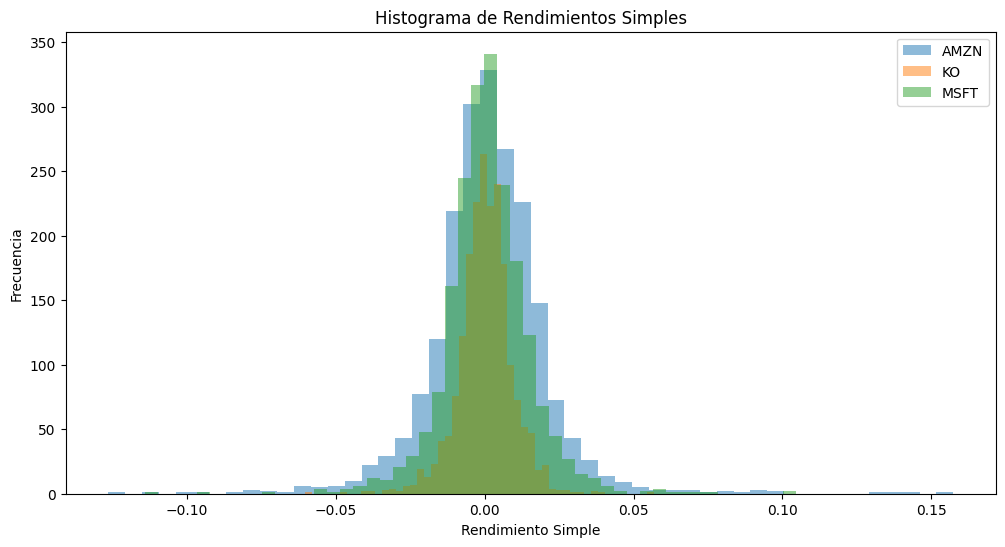

In [ ]:
#Histograma de los rendimientos simples de cada ticker
import matplotlib.pyplot as plt

# Datos de ejemplo
plt.figure(figsize=(12, 6))
plt.hist(simple_returns_amazondf, bins=50, alpha=0.5, label="AMZN")
plt.hist(simple_returns_kodf, bins=50, alpha=0.5, label="KO")
plt.hist(simple_returns_msftdf, bins=50, alpha=0.5, label="MSFT")
plt.xlabel("Rendimiento Simple")
plt.ylabel("Frecuencia")
plt.legend()
plt.title("Histograma de Rendimientos Simples")
plt.show()

10.- Bosqueja la serie de tiempo para cada ticker del inciso anterior. ¿Cuáles son tus conclusiones?

In [ ]:
# Módulos para realizar interfaces gráficas
import matplotlib.pyplot as plt
from pylab import plot
import seaborn as sns

In [ ]:
#Amazon
start = "2011-01-01"
end = "2019-01-01"

amazon_seriedetiempo = yf.download("AMZN", start, end)
amazon_seriedetiempo

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,9.068500,9.300000,9.060500,9.211000,9.211000,106628000
2011-01-04,9.307500,9.385000,9.189000,9.250500,9.250500,100636000
2011-01-05,9.205000,9.372500,9.203500,9.371000,9.371000,68376000
2011-01-06,9.325000,9.370500,9.262500,9.293000,9.293000,63594000
2011-01-07,9.394000,9.422500,9.187000,9.274500,9.274500,104434000
...,...,...,...,...,...,...
2018-12-24,67.300003,69.801498,65.349998,67.197998,67.197998,144400000
2018-12-26,68.444504,73.657997,68.150497,73.544998,73.544998,208236000
2018-12-27,72.709999,73.449997,69.515503,73.082001,73.082001,194440000


In [ ]:
amazon_seriedetiempo["Adj Close"]

Date
2011-01-03     9.211000
2011-01-04     9.250500
2011-01-05     9.371000
2011-01-06     9.293000
2011-01-07     9.274500
                ...    
2018-12-24    67.197998
2018-12-26    73.544998
2018-12-27    73.082001
2018-12-28    73.901001
2018-12-31    75.098503
Name: Adj Close, Length: 2012, dtype: float64

<Axes: xlabel='Date'>

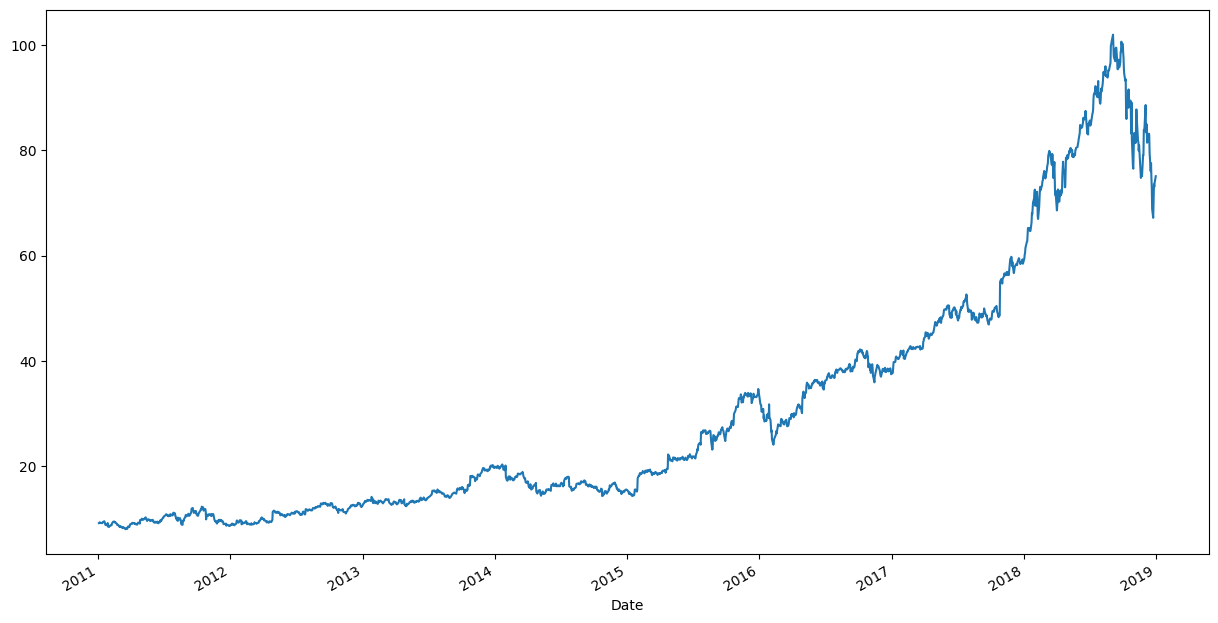

In [ ]:
#Serie de tiempo financiera para Amazon
amazon_seriedetiempo["Adj Close"].plot(label="AMZN", figsize = (15,8))

In [ ]:
#KO
start = "2011-01-01"
end = "2019-01-01"

ko_seriedetiempo = yf.download("KO", start, end)
ko_seriedetiempo

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,32.939999,32.939999,32.555000,32.610001,21.990656,18945600
2011-01-04,32.509998,32.595001,31.905001,31.934999,21.535463,27940400
2011-01-05,31.895000,31.975000,31.430000,31.745001,21.407337,34379000
2011-01-06,31.809999,31.830000,31.415001,31.514999,21.252235,21712400
2011-01-07,31.389999,31.500000,31.280001,31.459999,21.215145,16592800
...,...,...,...,...,...,...
2018-12-24,47.619999,47.869999,45.830002,45.959999,39.630630,10733700
2018-12-26,45.880001,46.959999,45.660000,46.939999,40.475670,14342600
2018-12-27,46.740002,47.549999,46.029999,47.529999,40.984417,16966500


In [ ]:
ko_seriedetiempo["Adj Close"]

Date
2011-01-03    21.990656
2011-01-04    21.535463
2011-01-05    21.407337
2011-01-06    21.252235
2011-01-07    21.215145
                ...    
2018-12-24    39.630630
2018-12-26    40.475670
2018-12-27    40.984417
2018-12-28    40.699867
2018-12-31    40.829205
Name: Adj Close, Length: 2012, dtype: float64

<Axes: xlabel='Date'>

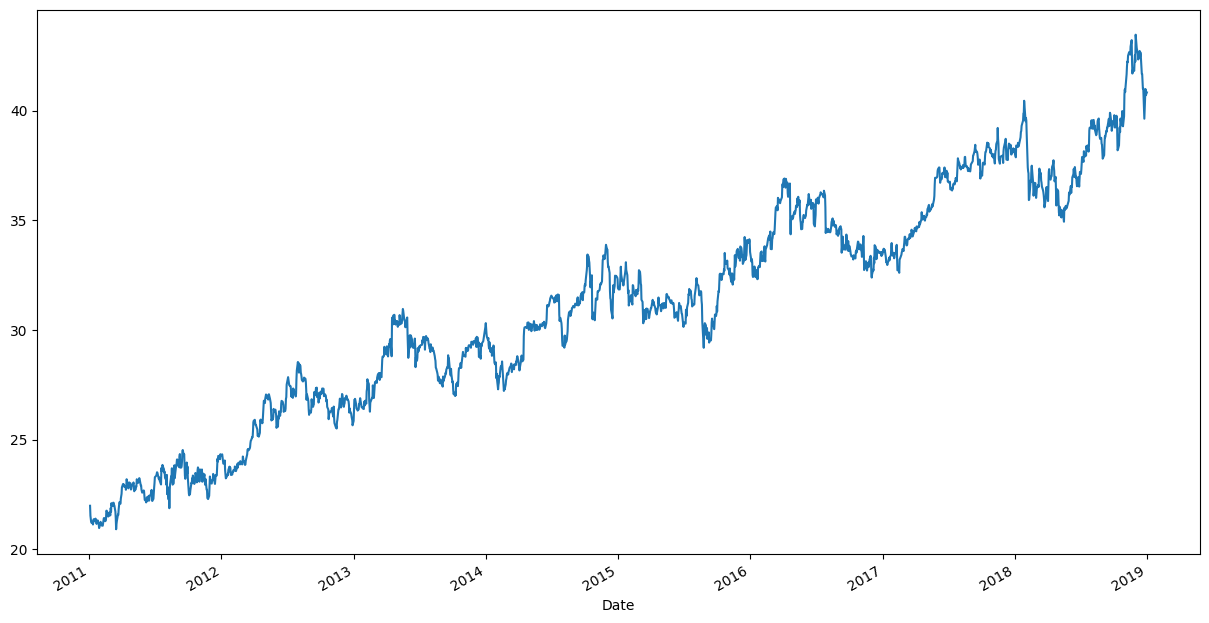

In [ ]:
#Serie de tiempo financiera para KO
ko_seriedetiempo["Adj Close"].plot(label="KO", figsize = (15,8))

In [ ]:
#MSFT
start = "2011-01-01"
end = "2019-01-01"

msft_seriedetiempo = yf.download("MSFT", start, end)
msft_seriedetiempo

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,28.049999,28.180000,27.920000,27.980000,21.708214,53443800
2011-01-04,27.940001,28.170000,27.850000,28.090000,21.793560,54405600
2011-01-05,27.900000,28.010000,27.770000,28.000000,21.723722,58998700
2011-01-06,28.040001,28.850000,27.860001,28.820000,22.359922,88026300
2011-01-07,28.639999,28.740000,28.250000,28.600000,22.189238,73762000
...,...,...,...,...,...,...
2018-12-24,97.680000,97.970001,93.980003,94.129997,89.566994,43935200
2018-12-26,95.139999,100.690002,93.959999,100.559998,95.685310,51634800
2018-12-27,99.300003,101.190002,96.400002,101.180000,96.275230,49498500


In [ ]:
msft_seriedetiempo["Adj Close"]

Date
2011-01-03    21.708214
2011-01-04    21.793560
2011-01-05    21.723722
2011-01-06    22.359922
2011-01-07    22.189238
                ...    
2018-12-24    89.566994
2018-12-26    95.685310
2018-12-27    96.275230
2018-12-28    95.523552
2018-12-31    96.646339
Name: Adj Close, Length: 2012, dtype: float64

<Axes: xlabel='Date'>

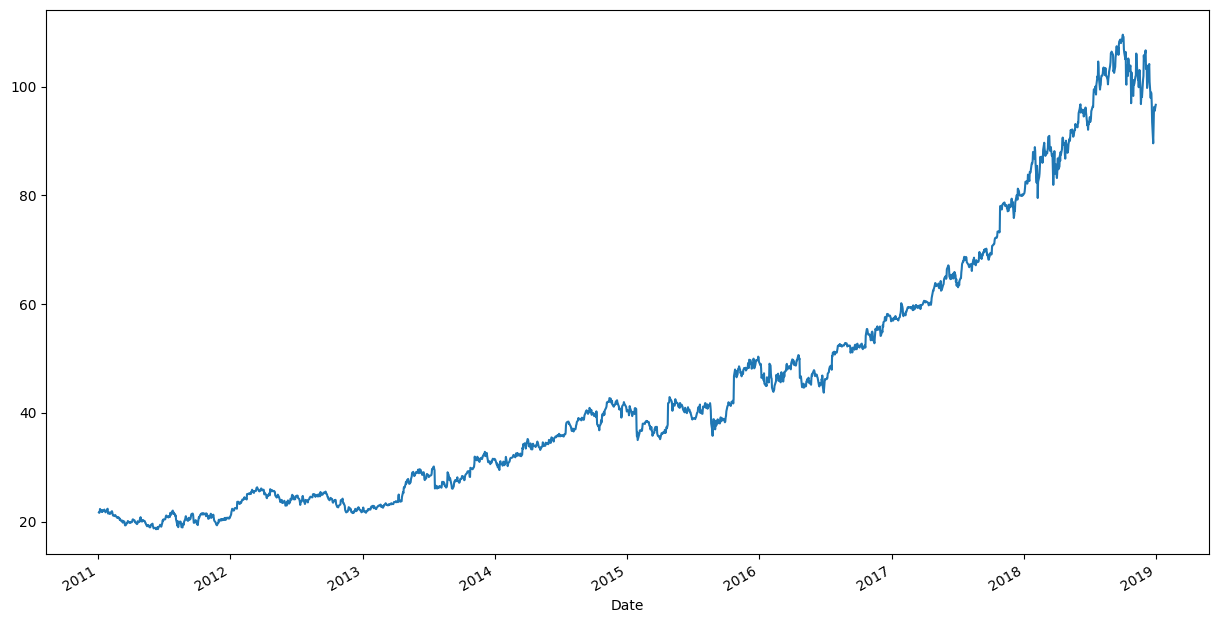

In [ ]:
#Serie de tiempo financiera para MSFT
msft_seriedetiempo["Adj Close"].plot(label="MSFT", figsize = (15,8))

En resumen, observamos un notable crecimiento en las tres acciones, aunque uno más constante en el caso de la tercera. Amazon y Microsoft, al ser compañías más orientadas a la tecnología, muestran un mayor potencial de crecimiento en comparación con Coca-Cola, lo cual se evidencia en su desempeño durante este periodo. A pesar de que las tres empresas muestran un crecimiento constante, Amazon es la que experimenta más variaciones, lo cual es comprensible dado que es la más reciente de las tres.

<Axes: xlabel='Date'>

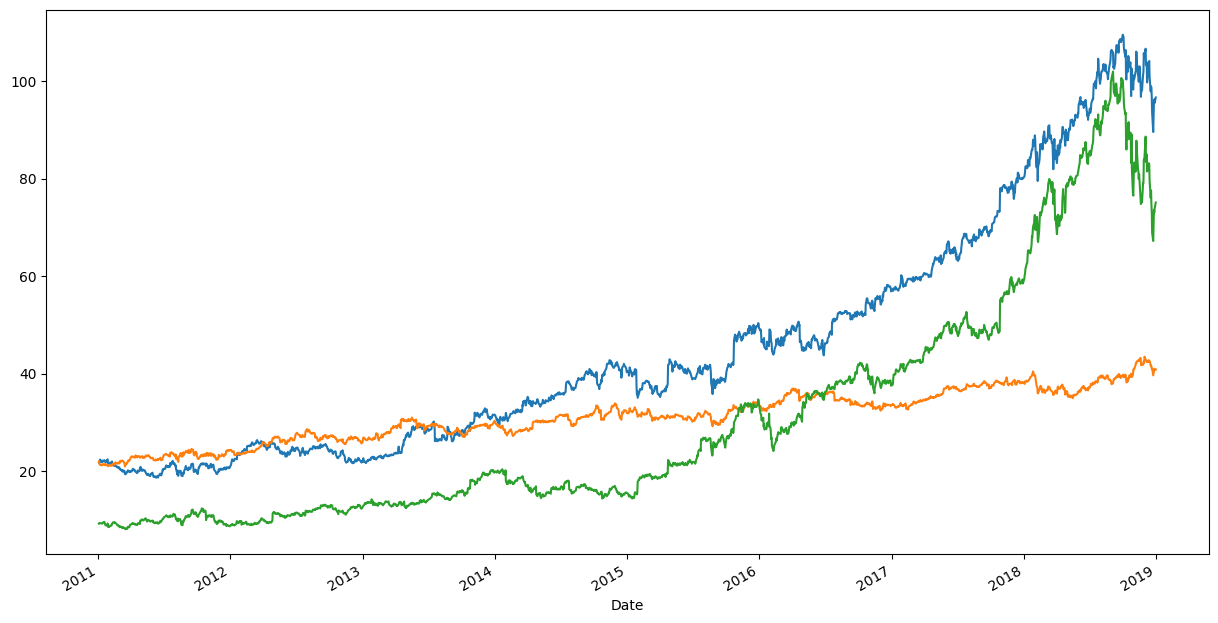

In [ ]:
#Series de tiempo financieras
msft_seriedetiempo["Adj Close"].plot(label="MSFT", figsize = (15,8))
ko_seriedetiempo["Adj Close"].plot(label="KO", figsize = (15,8))
amazon_seriedetiempo["Adj Close"].plot(label="AMZN", figsize = (15,8))